# Imports and Data Loading

In [10]:
import pandas as pd
from pathlib import Path

from models.fine_tuned_BERT_models.classifier import BERTBasedModel
from data_loader import AnnotationDataLoader
from model_evaluation import ModelEvalWrapper, ModelEvaluator, ReportsComparison
from transformers import AutoTokenizer

from models.config import PMB_DIR, BERT_DIR, MODELS_DIR

In [11]:
dataloader = AnnotationDataLoader()
train = dataloader.get_train()
val = dataloader.get_validation()
test = dataloader.get_test()

# Smaller Sweep (learning rate and number of epochs)

In [3]:
learning_rates = ["1e-5", "2e-5", "3e-5"]
epochs = [3, 5]

models = []
wrappers = []
evaluators = []
reports = []

for lr in learning_rates:
    for ep in epochs:
        model = BERTBasedModel(MODELS_DIR / f"PMB_lr{lr}_ep{ep}")
        wrapper = ModelEvalWrapper(model, f"PubMedBERT, lr {lr}, {ep} epochs")
        evaluator = ModelEvaluator(wrapper, test)
        report = evaluator.generate_report()

        models.append(model)
        wrappers.append(wrapper)
        evaluators.append(evaluator)
        reports.append(report)
        
report_compare = ReportsComparison(reports)

c:\Users\milap\Viral-Annotation-Classifier\data_loader\dataset_wrapper.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(value[idx]) for key, value in self.encodings.items()}
c:\Users\milap\Viral-Annotation-Classifier\data_loader\dataset_wrapper.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(value[idx]) for key, value in self.encodings.items()}
c:\Users\milap\Viral-Annotation-Classifier\data_loader\dataset_wrapper.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key:

In [6]:
report_compare.show_comparison_table()

Best accuracy: lr2e-5, 5 ep  
Best macro average f1: lr2e-5, 5 ep  
Best macro average precision: lr3e-5, 3 ep  
Best macro average recall: lr2e-5, 5 ep  
### We pick lr2e-5, 5 ep

# Larger Sweep (learning rate, number of epochs, and label smoothing)

In [ ]:
learning_rates = ["1.5e-5", "2e-5", "2.5e-5"]
epochs = [4, 5, 6]
label_smoothing = [0.0, 0.1]

models2 = []
wrappers2 = []
evaluators2 = []
reports2 = []

for lr in learning_rates:
    for ep in epochs:
        for ls in label_smoothing:
            model = BERTBasedModel(MODELS_DIR / f"PMB_lr{lr}_ep{ep}_ls{ls}")
            wrapper = ModelEvalWrapper(model, f"PubMedBERT, lr {lr}, {ep} epochs, ls {ls}")
            evaluator = ModelEvaluator(wrapper, test)
            report = evaluator.generate_report()

            models2.append(model)
            wrappers2.append(wrapper)
            evaluators2.append(evaluator)
            reports2.append(report)
        
report_compare2 = ReportsComparison(reports2)
report_compare2.show_comparison_plot()

In [7]:
lr = "2.5e-5"
ep = 5
ls = 0.1
model = BERTBasedModel(MODELS_DIR / f"PMB_lr{lr}_ep{ep}_ls{ls}")
wrapper = ModelEvalWrapper(model, f"PubMedBERT, lr {lr}, {ep} epochs, ls {ls}")
evaluator = ModelEvaluator(wrapper, test)
report = evaluator.generate_report()

c:\Users\milap\Viral-Annotation-Classifier\data_loader\dataset_wrapper.py:19: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).



# Importing Model from Huggingface

In [9]:
pubmedBERT = BERTBasedModel("Mila-MP/IBP_test_model", "BERT_model")
pmb_wrapper = ModelEvalWrapper(pubmedBERT, "PubMedBERT Model")
pmb_evaluator = ModelEvaluator(pmb_wrapper, test)
pmb_report = pmb_evaluator.generate_report()
# pmb_report.show_report()

c:\Users\milap\Viral-Annotation-Classifier\data_loader\dataset_wrapper.py:19: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).



# Model Reports

In [29]:
PMB_lr2e5_ep5_ls0 = BERTBasedModel(MODELS_DIR / "PMB_lr2e-5_ep5") # best from small sweep
PMB_lr25e5_ep5_ls01 = BERTBasedModel(MODELS_DIR / "PMB_lr2.5e-5_ep5_ls0.1") # best from large sweep
PMB_model = BERTBasedModel(MODELS_DIR / "PMB_model")

PMB_lr2e5_ep5_ls0_w = ModelEvalWrapper(PMB_lr2e5_ep5_ls0, "PMB, lr 2e-5, 5 ep, ls 0")
PMB_lr25e5_ep5_ls01_w = ModelEvalWrapper(PMB_lr25e5_ep5_ls01, "PMB, lr 2.5e-5, 5 ep, ls 0.1")
PMB_model_w = ModelEvalWrapper(PMB_model, "OG PMB model")

PMB_lr2e5_ep5_ls0_ev = ModelEvaluator(PMB_lr2e5_ep5_ls0_w, val)
PMB_lr25e5_ep5_ls01_ev = ModelEvaluator(PMB_lr25e5_ep5_ls01_w, test)
PMB_model_ev = ModelEvaluator(PMB_model_w, test)

In [30]:
report1 = PMB_lr2e5_ep5_ls0_ev.generate_report()
report2 = PMB_lr25e5_ep5_ls01_ev.generate_report()
report3 = PMB_model_ev.generate_report()

c:\Users\milap\Viral-Annotation-Classifier\data_loader\dataset_wrapper.py:19: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).

c:\Users\milap\Viral-Annotation-Classifier\data_loader\dataset_wrapper.py:19: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).

c:\Users\milap\Viral-Annotation-Classifier\data_loader\dataset_wrapper.py:19: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).




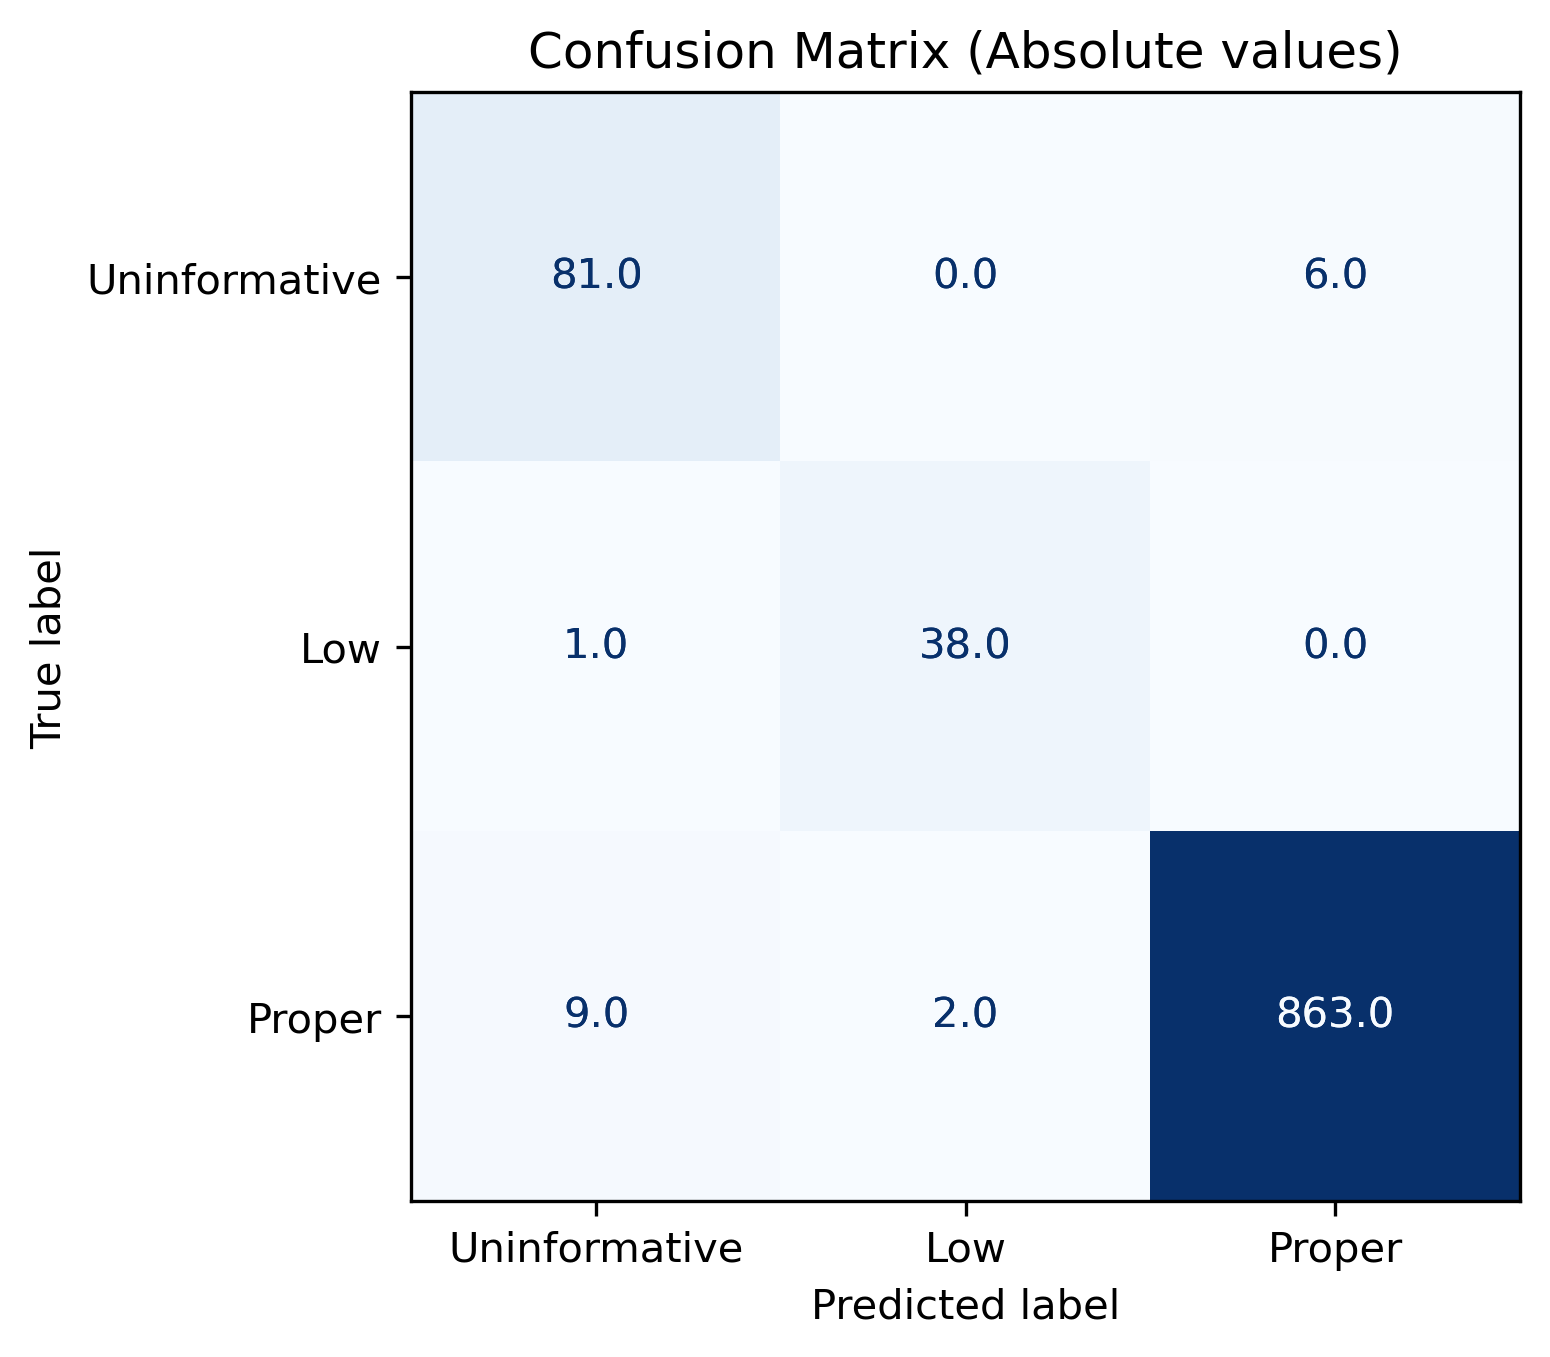
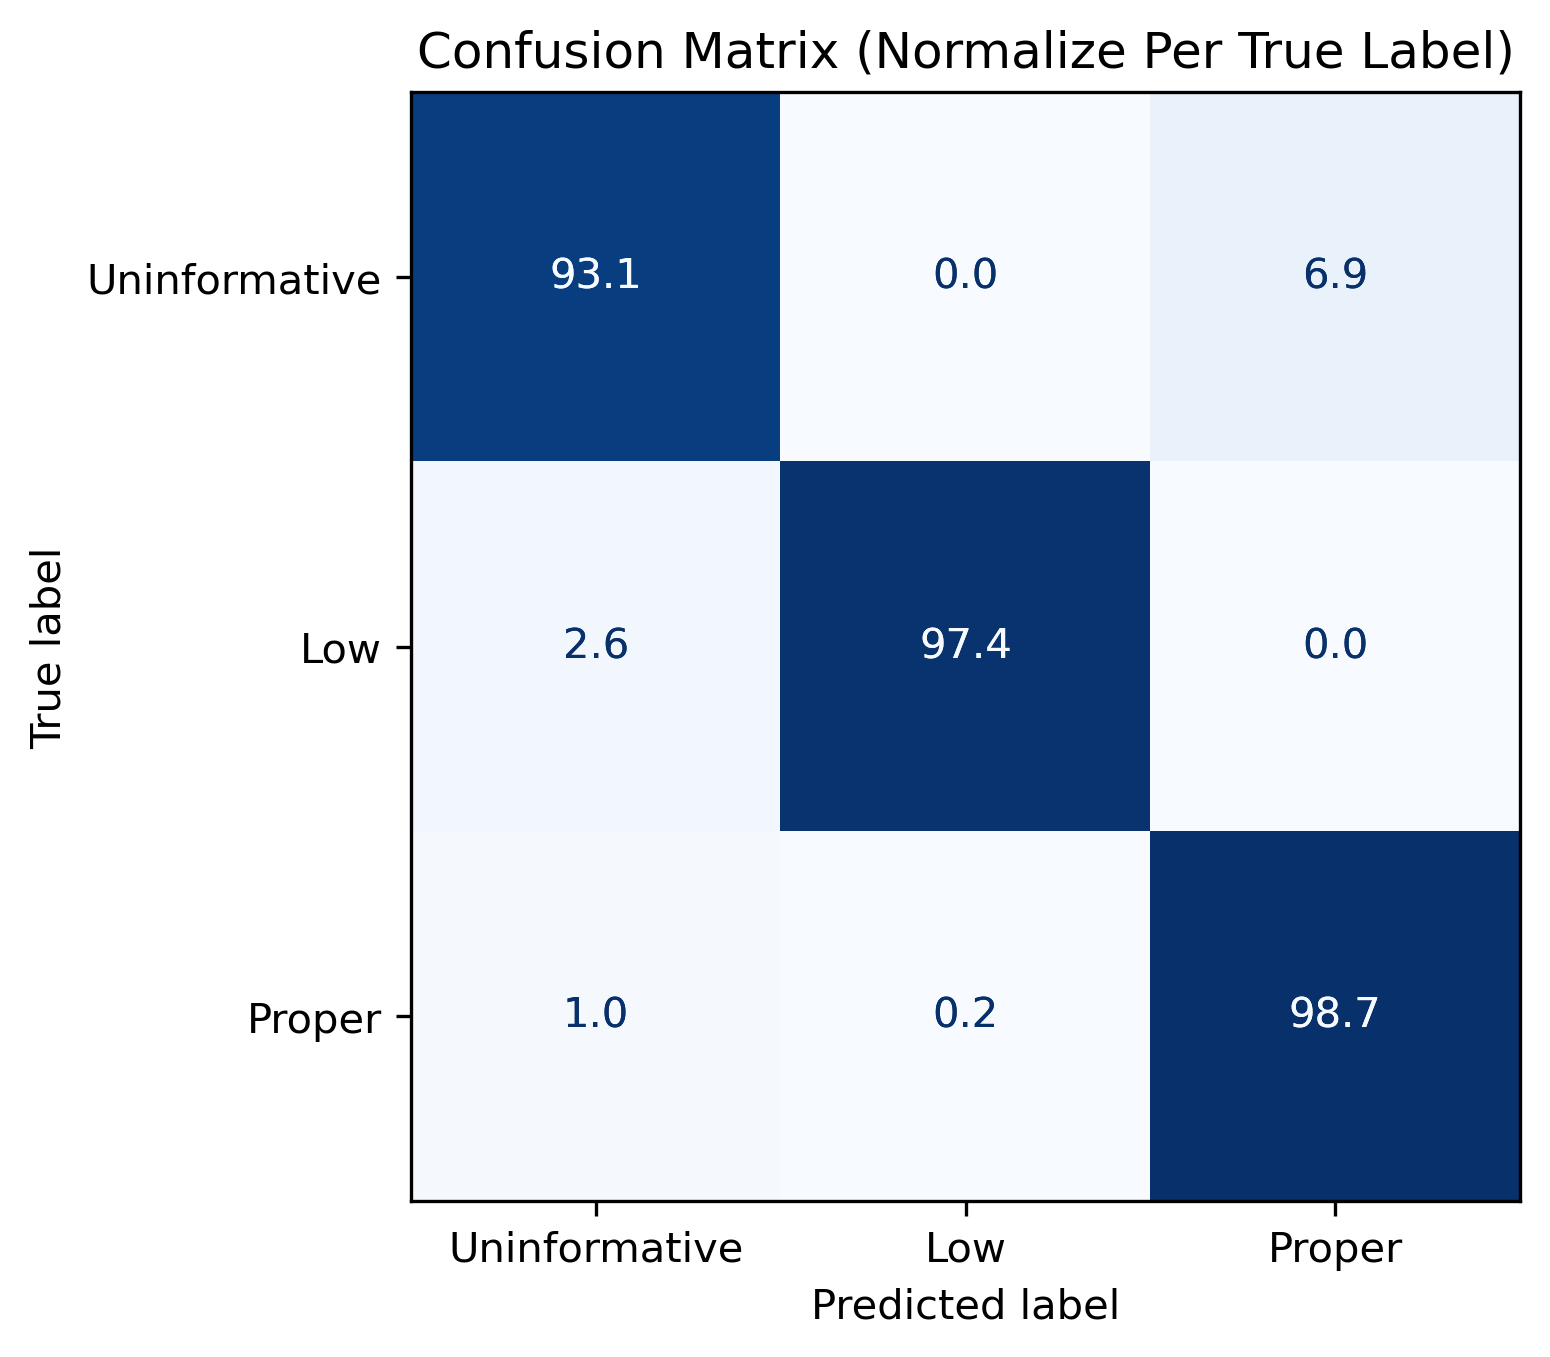

In [31]:
report1.show_report()


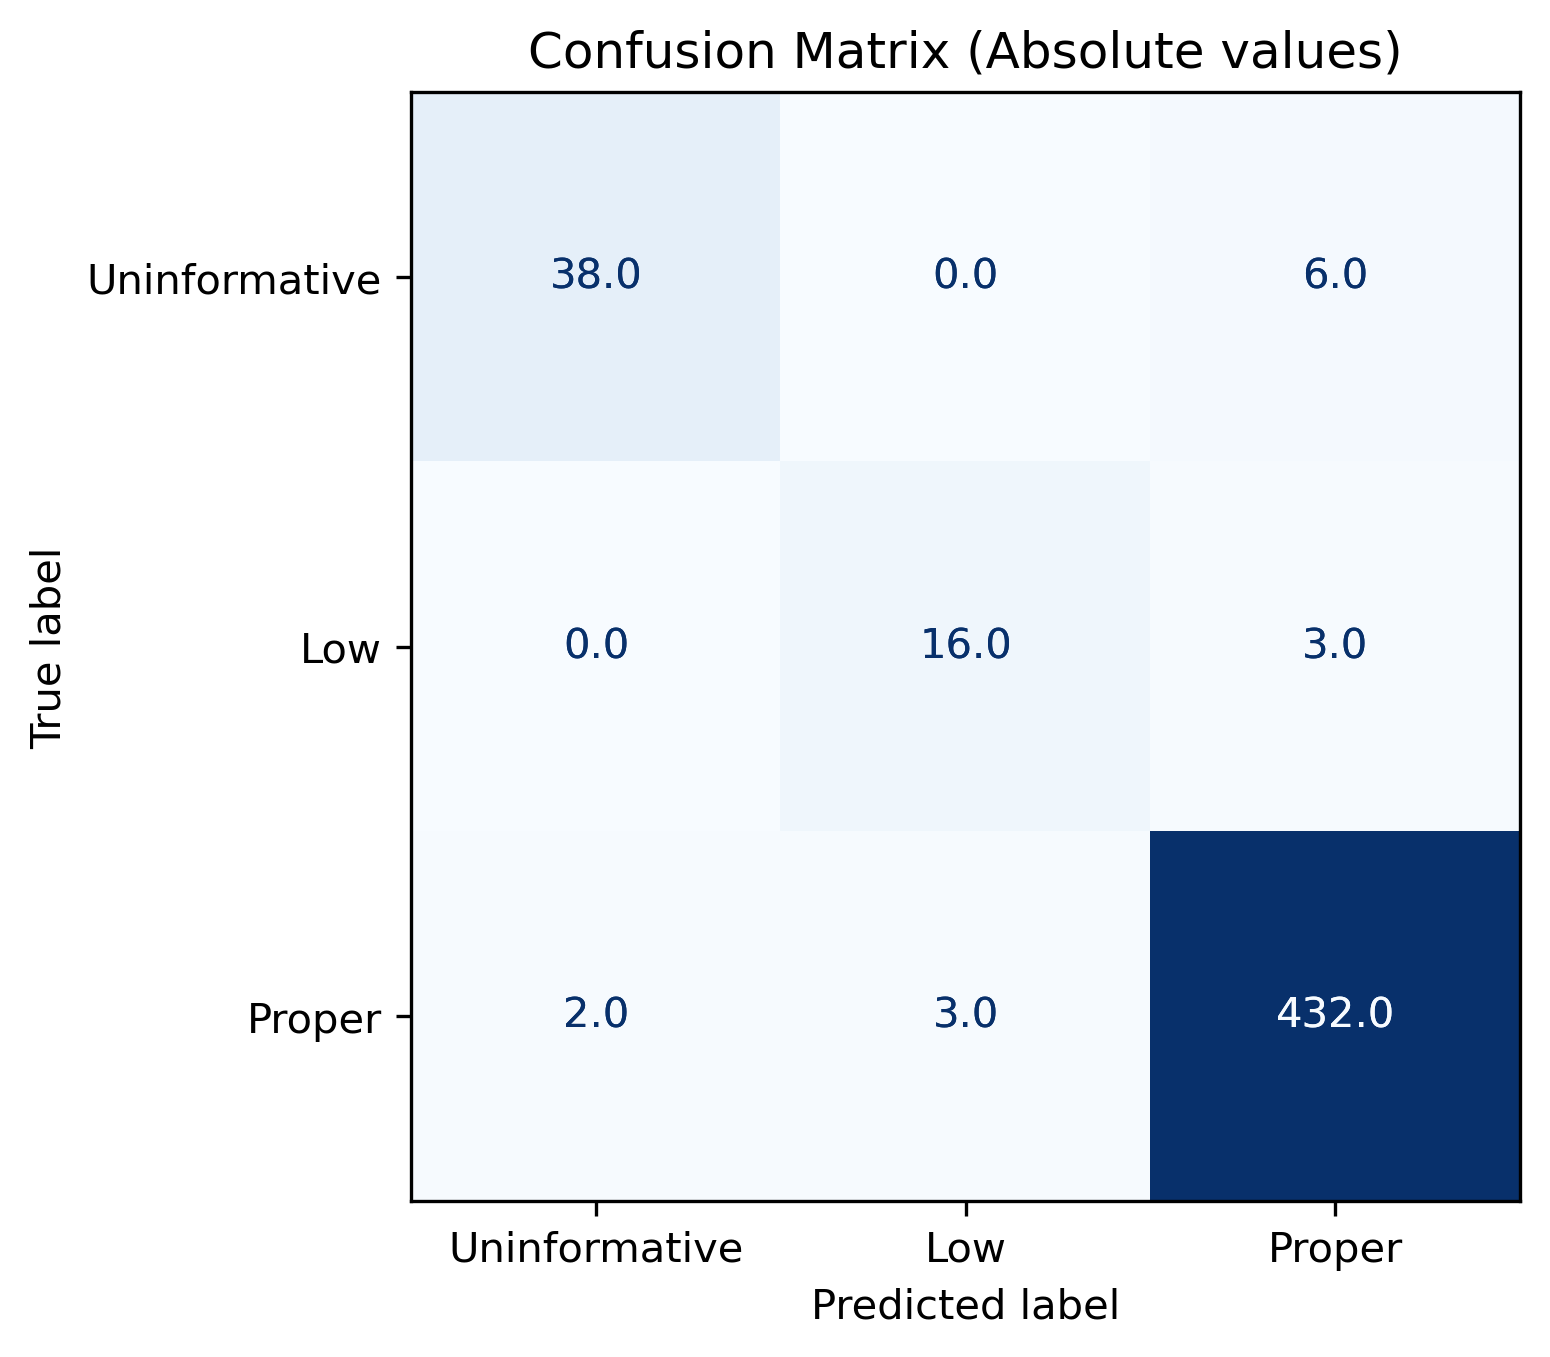
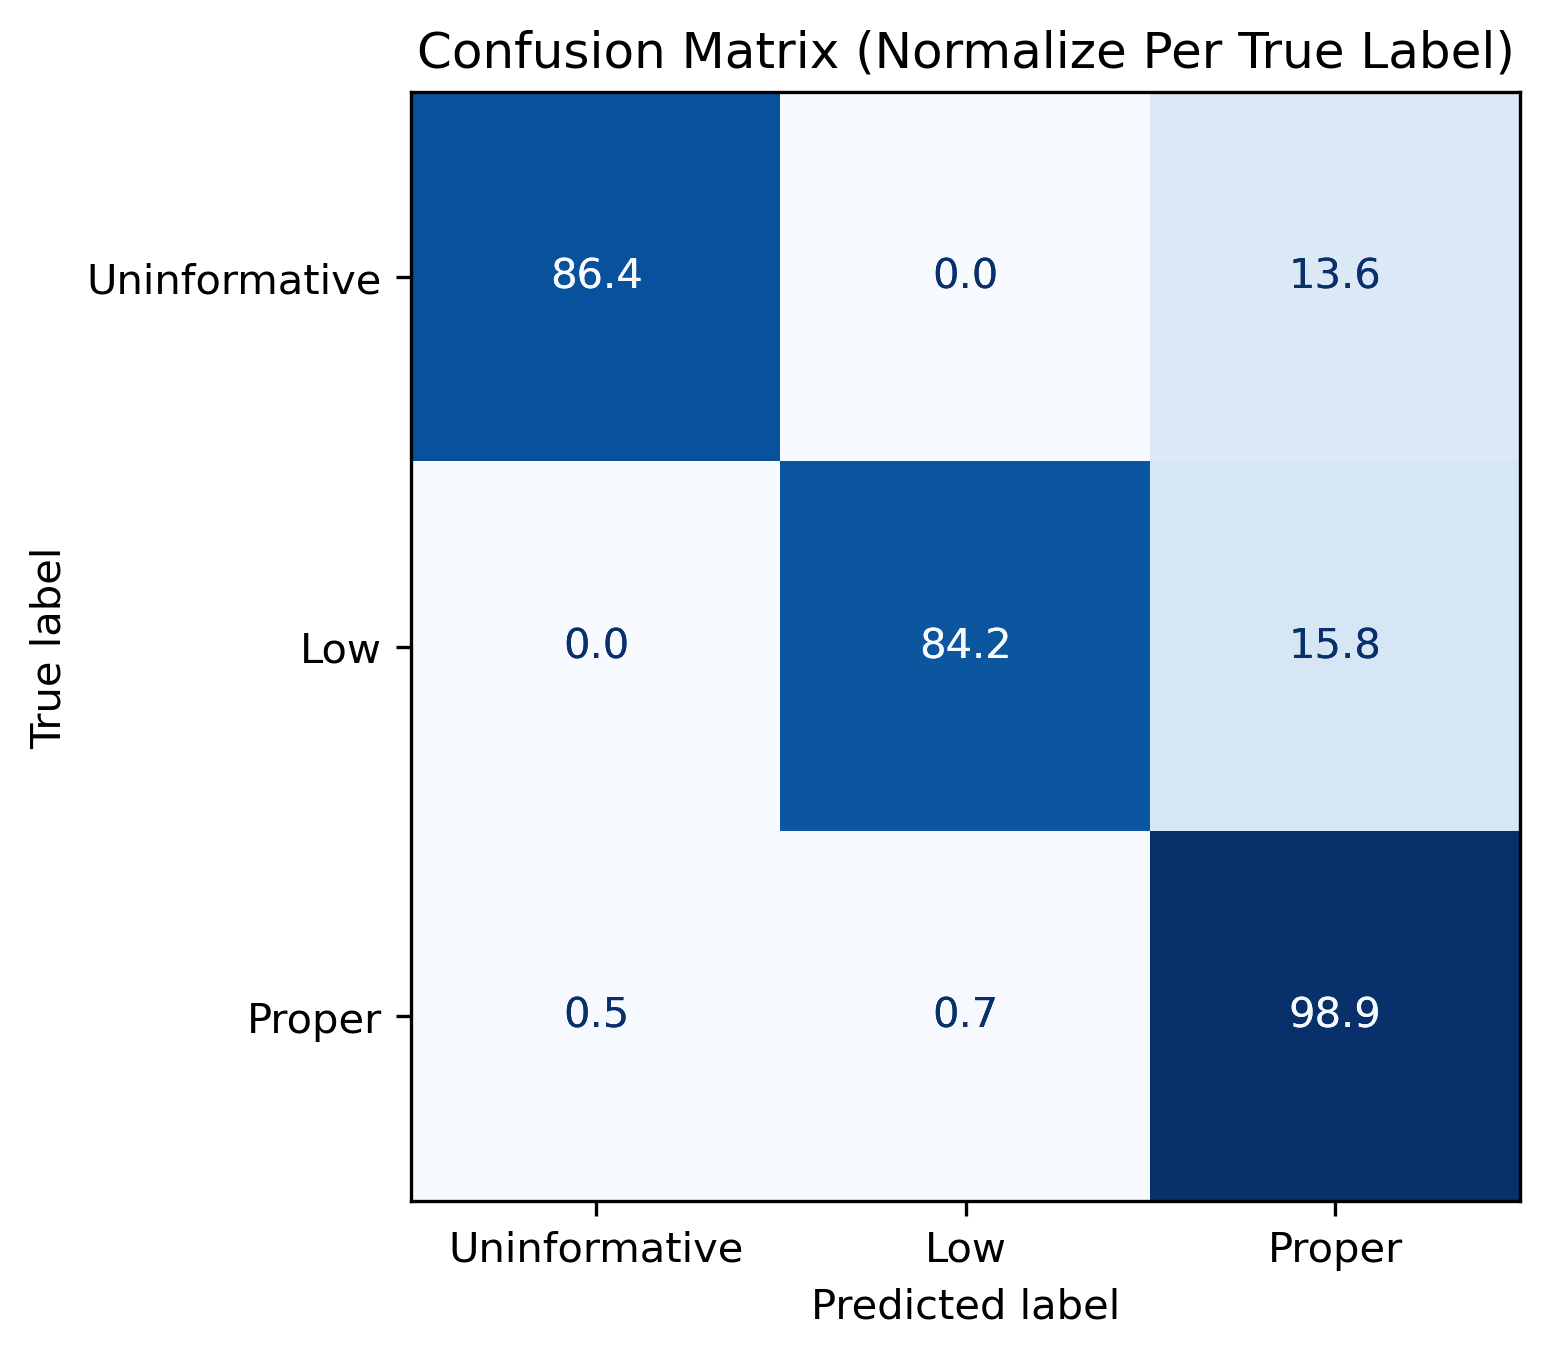

In [27]:
report2.show_report()


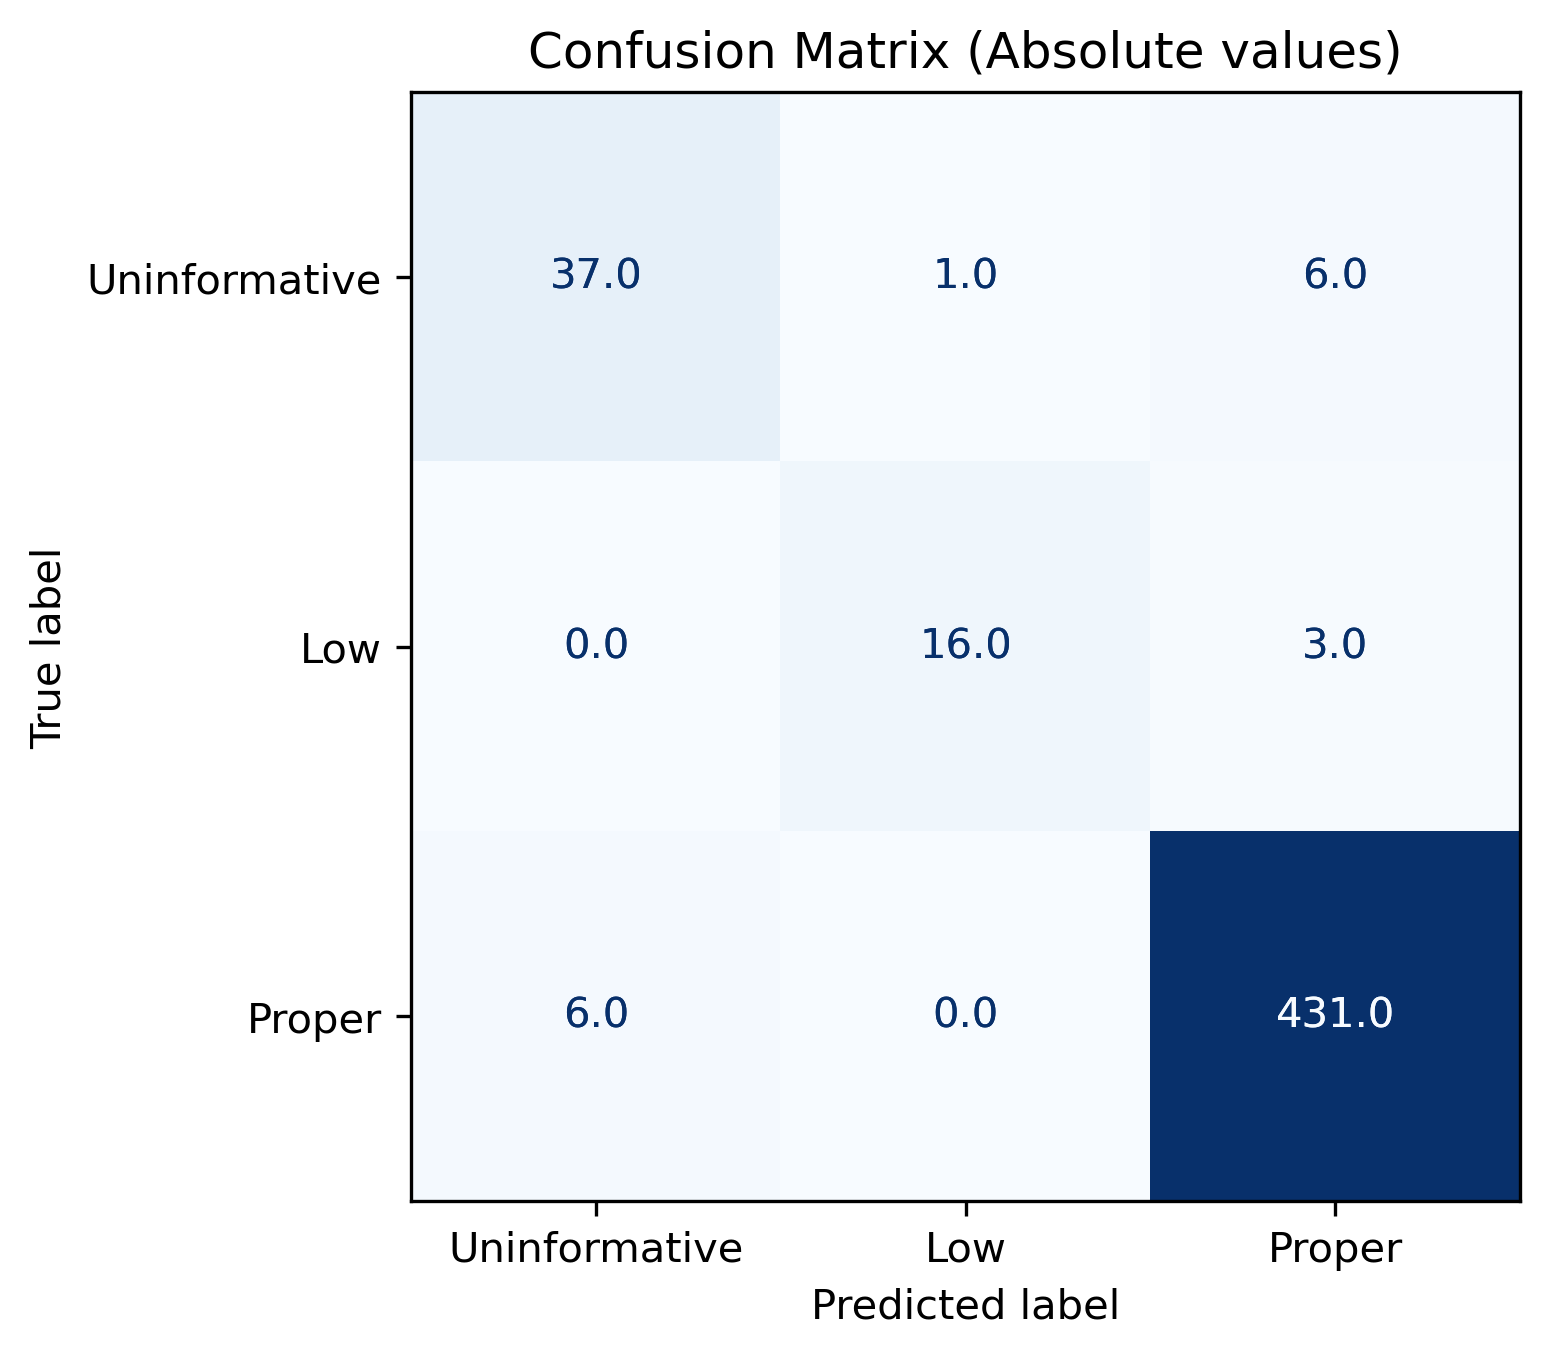
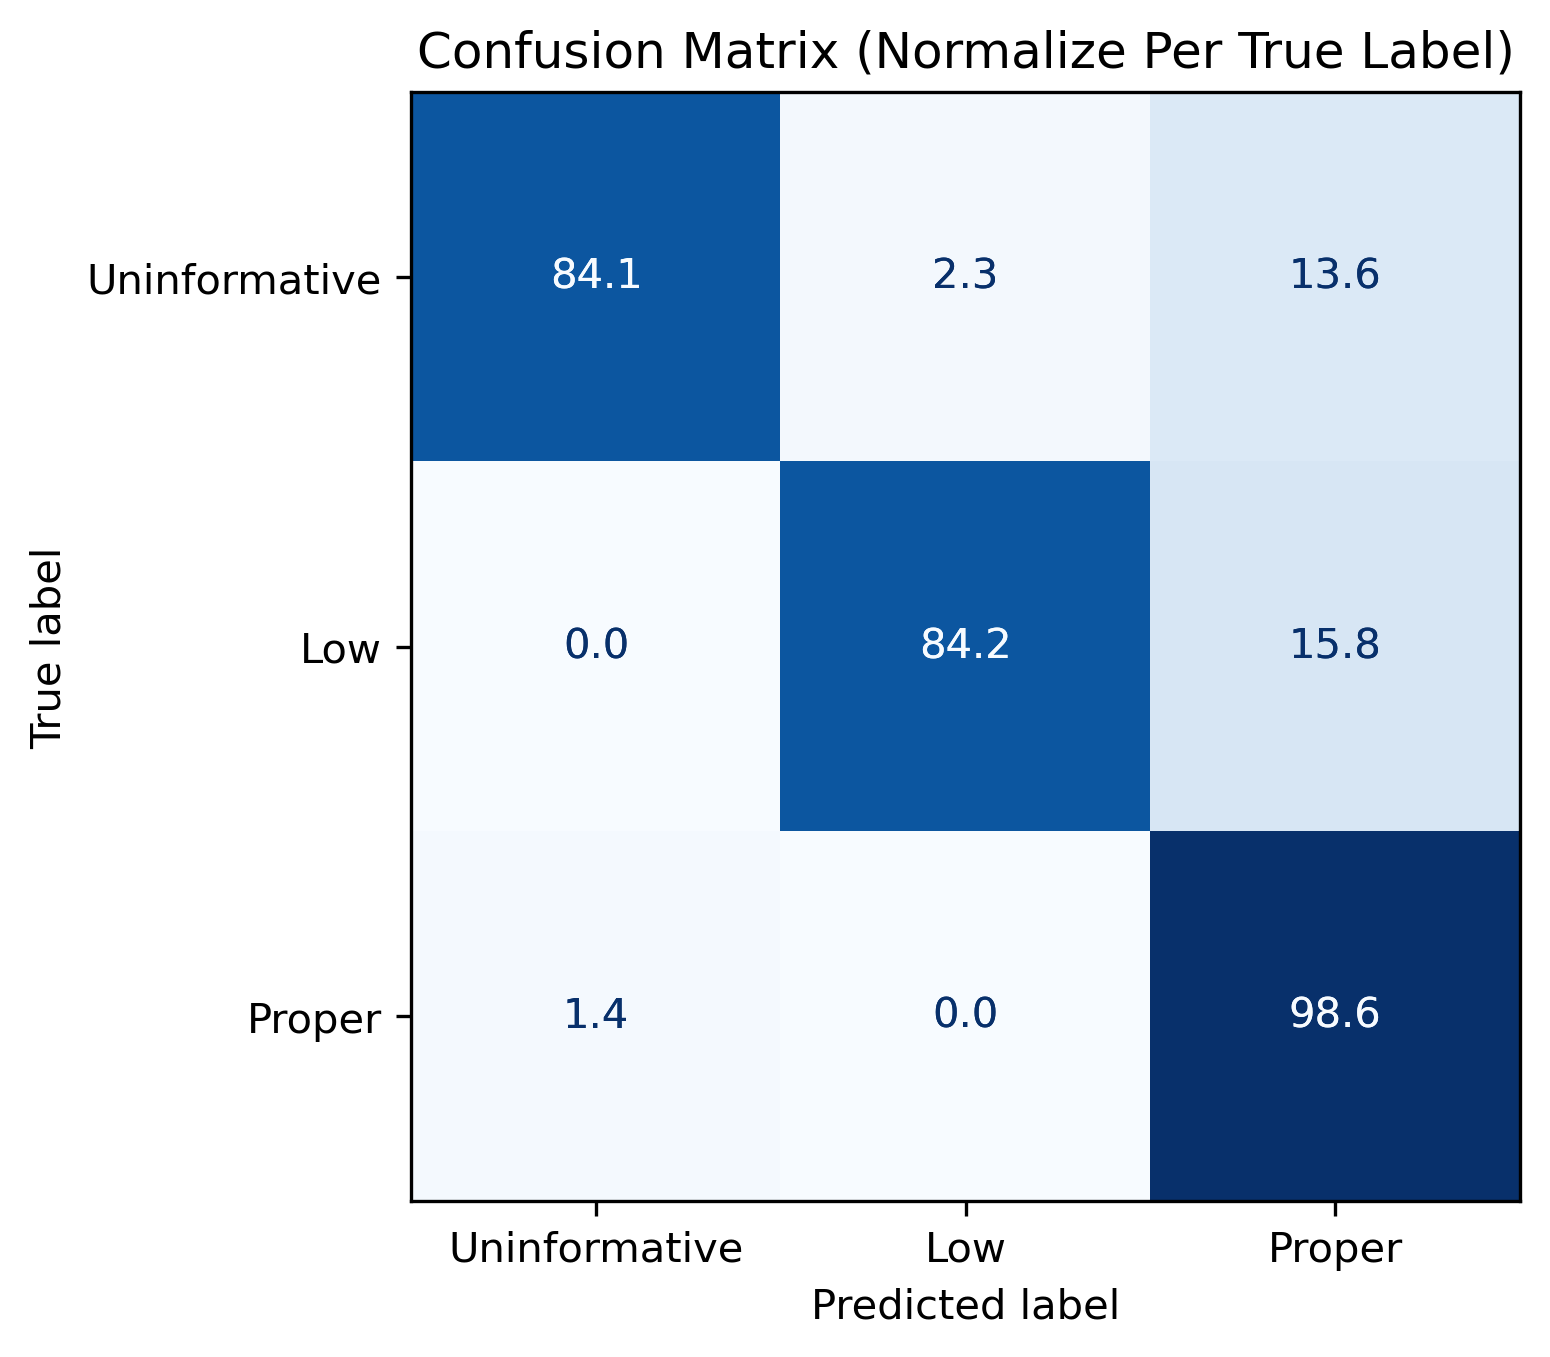

In [28]:
report3.show_report()